In [12]:
from verticox.aggregator import Lz, group_samples_at_risk
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [25]:
NUM_SAMPLES = 2 # If we want a 2 dimensional input space we need to stick to 2 samples
MIN = -5.0
MAX = 5.0
STEP_SIZE = 0.01
WIDTH = int((MAX - MIN)//STEP_SIZE) + 1

RESOLUTION = (WIDTH, WIDTH)
RESOLUTION
PARTIAL_DERIVATIVE_IDX = 0

In [26]:
K =1
gamma = np.arange(NUM_SAMPLES)
sigma = gamma
rho = 0.25
events = [1,2]
Rt = group_samples_at_risk(events, None)

params = Lz.Parameters(gamma, sigma, rho, Rt, K, events)

params

Parameters(gamma=array([0, 1]), sigma=array([0, 1]), rho=0.25, Rt={1: array([0, 1]), 2: array([1])}, K=1, event_times=[1, 2])

In [27]:
def apply_func(f):
    result = np.zeros(RESOLUTION)

    for idx_1, z_1 in enumerate(np.arange(MIN, MAX, STEP_SIZE)):
        for idx_2, z_2 in enumerate(np.arange(MIN, MAX, STEP_SIZE)):
            z = np.array([z_1, z_2])

            result[idx_1, idx_2] = f(z)
        
    return result


## The objective function

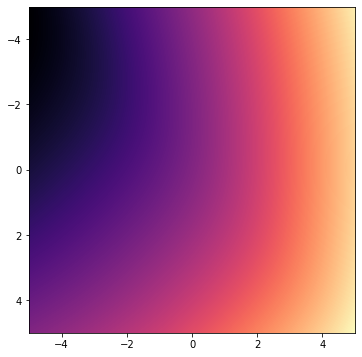

In [28]:
f = lambda z: Lz.parametrized(z, params)

result = apply_func(f)

fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(result, extent=[MIN, MAX, MAX, MIN], cmap='magma')

## First order diff

array([[-0.0024625 , -0.0025125 , -0.0025625 , ..., -0.01248656,
        -0.01248657, -0.01248658],
       [-0.0023875 , -0.0024375 , -0.0024875 , ..., -0.01246155,
        -0.01246156, -0.01246157],
       [-0.00231251, -0.0023625 , -0.0024125 , ..., -0.01243654,
        -0.01243655, -0.01243656],
       ...,
       [ 0.03241156,  0.03241155,  0.03241154, ...,  0.0223875 ,
         0.0223375 ,  0.02228751],
       [ 0.03243657,  0.03243656,  0.03243655, ...,  0.0224625 ,
         0.0224125 ,  0.0223625 ],
       [ 0.03246158,  0.03246157,  0.03246156, ...,  0.0225375 ,
         0.0224875 ,  0.0224375 ]])

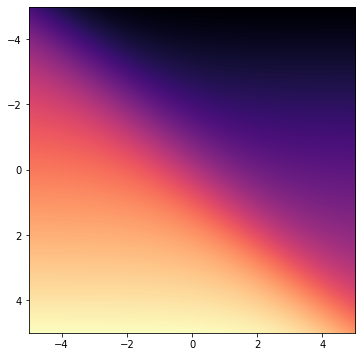

In [32]:
diff = np.diff(result, axis=0)
fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(diff, extent=[MIN, MAX, MAX, MIN], cmap='magma')
diff

## First order partial derivative

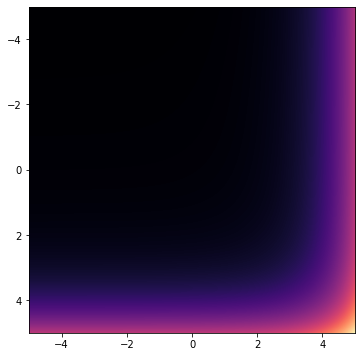

In [33]:
derivative_1 = lambda z: Lz.derivative_1_parametrized(z, params, PARTIAL_DERIVATIVE_IDX)

result_d1 = apply_func(derivative_1)

fig, ax = plt.subplots(figsize=(6,6))

ax.imshow(result_d1, extent=[MIN, MAX, MAX, MIN], cmap='magma')

It doesn't look the same.

Let's try a dataset with only one sample

In [34]:
NUM_SAMPLES = 1
K =1
gamma = np.arange(NUM_SAMPLES)
sigma = gamma
rho = 0.25
events = [1]
Rt = group_samples_at_risk(events, None)

params = Lz.Parameters(gamma, sigma, rho, Rt, K, events)
params

Parameters(gamma=array([0]), sigma=array([0]), rho=0.25, Rt={1: array([0])}, K=1, event_times=[1])

Text(0.5, 1.0, 'np.diff')

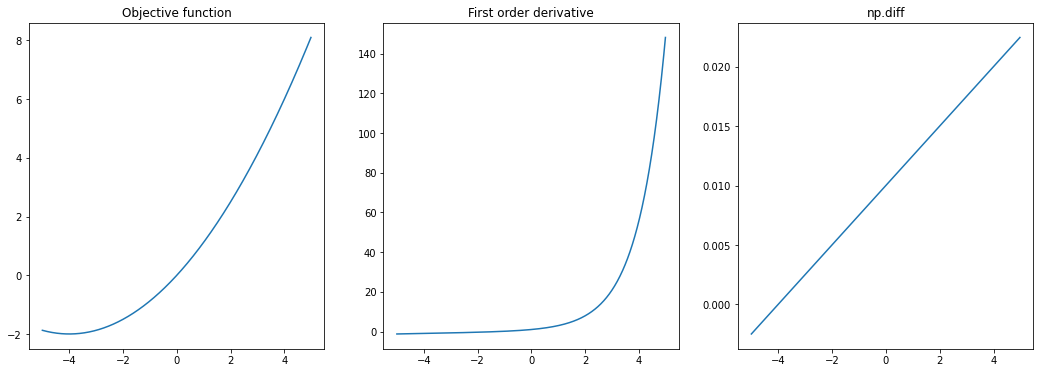

In [37]:
onedim_f = lambda z: Lz.parametrized(z, params)
onedim_derivative_1 = lambda z: Lz.derivative_1_parametrized(z, params, PARTIAL_DERIVATIVE_IDX)


z_values = np.arange(MIN, MAX, STEP_SIZE)

def apply_onedim(f, x):
    result = np.zeros(x.shape)

    for idx, z in enumerate(z_values):
        result[idx] = f(np.array([z]))
    return result

onedim_f_result = apply_onedim(onedim_f, z_values)

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.plot(z_values, onedim_f_result)
ax1.set_title('Objective function')

ax2.plot(z_values, apply_onedim(onedim_derivative_1, z_values))
ax2.set_title('First order derivative')

ax3.plot(z_values[:-1], np.diff(onedim_f_result, axis=0))
ax3.set_title('np.diff')



In [ ]:
onedi

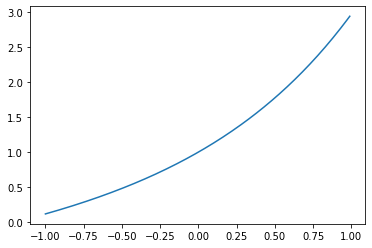

In [10]:
d1_result = np.zeros(WIDTH)
z_values = np.arange(MIN, MAX, STEP_SIZE)
for idx, z in enumerate(z_values):
    d1_result[idx] = derivative_1(np.array([z]))

plt.plot(z_values, d1_result)

ValueError: x and y must have same first dimension, but have shapes (199,) and (200, 199)

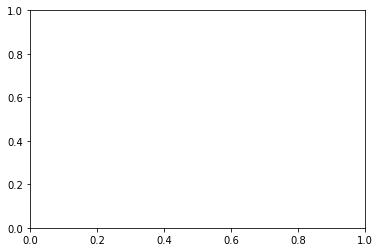

In [11]:
diff_result = np.diff(result)
z_values = np.arange(MIN, MAX, STEP_SIZE)

plt.plot(z_values[:-1], diff_result)